<center><h1><bold>Classification of Wildfire Casuses</bold></h1></center>

## Stage One - Data Preprocessing and analysis
#### Importing necessary python libraries required for data wrangling
- <code>Pandas</code>: for data structutres and tools for effective data cleaning
- <code>Numpy</code>: enable us scientific computing on data set
- <code>Matplotlib</code>: allow for graphical representation of the data set features
- <code>Seaborn</code>: for statistical graphs
- <code>Sqlite3</code>: provide connection to sqlite database to allow us read our data

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

### We need to establish connection with the database file

In [3]:
# Connecting to the SQLite Database and getting database path
database_path = r'/Users/kelvinagara/Desktop/Data_Science MSc/Data Minig and Machine Learning/Course Work/GroupProj/FPA_FOD_20221014.sqlite'
conn = sqlite3.connect(database_path)

Then we need to select the <code>Fires</code> table from the database file

In [4]:
# retrieve data as a Pandas Dataframe
query = "SELECT * FROM Fires"
df = pd.read_sql_query(query, conn)

### Now we inspect and analyze the data to see what it tells us about the fires

In [5]:
# Initial inspetion
df.head()

,OBJECTID,Shape,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,...,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,b'\x00\x01\xad\x10\x00\x00\xc8\xce\n[_@^\xc0\x...,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,...,1730,0.10,A,40.036944,-121.005833,USFS,CA,63,06063,Plumas County
1,2,b'\x00\x01\xad\x10\x00\x00\xc8\xe594\xe2\x19^\...,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,...,1530,0.25,A,38.933056,-120.404444,USFS,CA,61,06061,Placer County
2,3,b'\x00\x01\xad\x10\x00\x00x{\xac \x13/^\xc0@\x...,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,...,2024,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17,06017,El Dorado County
3,4,b'\x00\x01\xad\x10\x00\x00\xc8\x13u\xd7s\xfa]\...,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,...,1400,0.10,A,38.559167,-119.913333,USFS,CA,3,06003,Alpine County
4,5,b'\x00\x01\xad\x10\x00\x00\xd0\x11y\xf8\xb6\xf...,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,...,1200,0.10,A,38.559167,-119.933056,USFS,CA,3,06003,Alpine County


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303566 entries, 0 to 2303565
Data columns (total 39 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   OBJECTID                       int64  
 1   Shape                          object 
 2   FOD_ID                         int64  
 3   FPA_ID                         object 
 4   SOURCE_SYSTEM_TYPE             object 
 5   SOURCE_SYSTEM                  object 
 6   NWCG_REPORTING_AGENCY          object 
 7   NWCG_REPORTING_UNIT_ID         object 
 8   NWCG_REPORTING_UNIT_NAME       object 
 9   SOURCE_REPORTING_UNIT          object 
 10  SOURCE_REPORTING_UNIT_NAME     object 
 11  LOCAL_FIRE_REPORT_ID           object 
 12  LOCAL_INCIDENT_ID              object 
 13  FIRE_CODE                      object 
 14  FIRE_NAME                      object 
 15  ICS_209_PLUS_INCIDENT_JOIN_ID  object 
 16  ICS_209_PLUS_COMPLEX_JOIN_ID   object 
 17  MTBS_ID                        object 
 18  MT

### Next we view the features in our dataframe and drop the columns with lots of missing data

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

OBJECTID                               0
Shape                                  0
FOD_ID                                 0
FPA_ID                                 0
SOURCE_SYSTEM_TYPE                     0
SOURCE_SYSTEM                          0
NWCG_REPORTING_AGENCY                  0
NWCG_REPORTING_UNIT_ID                 0
NWCG_REPORTING_UNIT_NAME               0
SOURCE_REPORTING_UNIT                  0
SOURCE_REPORTING_UNIT_NAME             0
LOCAL_FIRE_REPORT_ID             1825891
LOCAL_INCIDENT_ID                 744411
FIRE_CODE                        1906149
FIRE_NAME                         964444
ICS_209_PLUS_INCIDENT_JOIN_ID    2270072
ICS_209_PLUS_COMPLEX_JOIN_ID     2298627
MTBS_ID                          2289696
MTBS_FIRE_NAME                   2289696
COMPLEX_NAME                     2297619
FIRE_YEAR                              0
DISCOVERY_DATE                         0
DISCOVERY_DOY                          0
DISCOVERY_TIME                    789095
NWCG_CAUSE_CLASS

### Dropping columns with large amounts of null values before futher analysis

In [8]:
# dropping 13 features from dataframe, using inpalce to modify the dataframe
df.drop(['NWCG_CAUSE_AGE_CATEGORY', 'COMPLEX_NAME', 'MTBS_FIRE_NAME', 'MTBS_ID', 'ICS_209_PLUS_COMPLEX_JOIN_ID', 'ICS_209_PLUS_INCIDENT_JOIN_ID',
         'LOCAL_FIRE_REPORT_ID', 'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME', 'CONT_TIME', 'CONT_DOY',], axis=1, inplace=True)

In [9]:
df.shape

(2303566, 27)

In [10]:
missing_values = df.isnull().sum()
missing_values

OBJECTID                           0
Shape                              0
FOD_ID                             0
FPA_ID                             0
SOURCE_SYSTEM_TYPE                 0
SOURCE_SYSTEM                      0
NWCG_REPORTING_AGENCY              0
NWCG_REPORTING_UNIT_ID             0
NWCG_REPORTING_UNIT_NAME           0
SOURCE_REPORTING_UNIT              0
SOURCE_REPORTING_UNIT_NAME         0
FIRE_YEAR                          0
DISCOVERY_DATE                     0
DISCOVERY_DOY                      0
DISCOVERY_TIME                789095
NWCG_CAUSE_CLASSIFICATION          0
NWCG_GENERAL_CAUSE                 0
CONT_DATE                     894813
FIRE_SIZE                          0
FIRE_SIZE_CLASS                    0
LATITUDE                           0
LONGITUDE                          0
OWNER_DESCR                        0
STATE                              0
COUNTY                        665779
FIPS_CODE                     665779
FIPS_NAME                     665780
d

### Now we also want to drop the rows with missing values

In [11]:
df.dropna(subset=['DISCOVERY_TIME', 'COUNTY', 'FIPS_CODE', 'FIPS_NAME', 'CONT_DATE'], axis=0, inplace=True)

In [12]:
missing_values = df.isnull().sum()
missing_values

OBJECTID                      0
Shape                         0
FOD_ID                        0
FPA_ID                        0
SOURCE_SYSTEM_TYPE            0
SOURCE_SYSTEM                 0
NWCG_REPORTING_AGENCY         0
NWCG_REPORTING_UNIT_ID        0
NWCG_REPORTING_UNIT_NAME      0
SOURCE_REPORTING_UNIT         0
SOURCE_REPORTING_UNIT_NAME    0
FIRE_YEAR                     0
DISCOVERY_DATE                0
DISCOVERY_DOY                 0
DISCOVERY_TIME                0
NWCG_CAUSE_CLASSIFICATION     0
NWCG_GENERAL_CAUSE            0
CONT_DATE                     0
FIRE_SIZE                     0
FIRE_SIZE_CLASS               0
LATITUDE                      0
LONGITUDE                     0
OWNER_DESCR                   0
STATE                         0
COUNTY                        0
FIPS_CODE                     0
FIPS_NAME                     0
dtype: int64

In [13]:
df.shape

(972875, 27)

### Analyzing the relationship between features

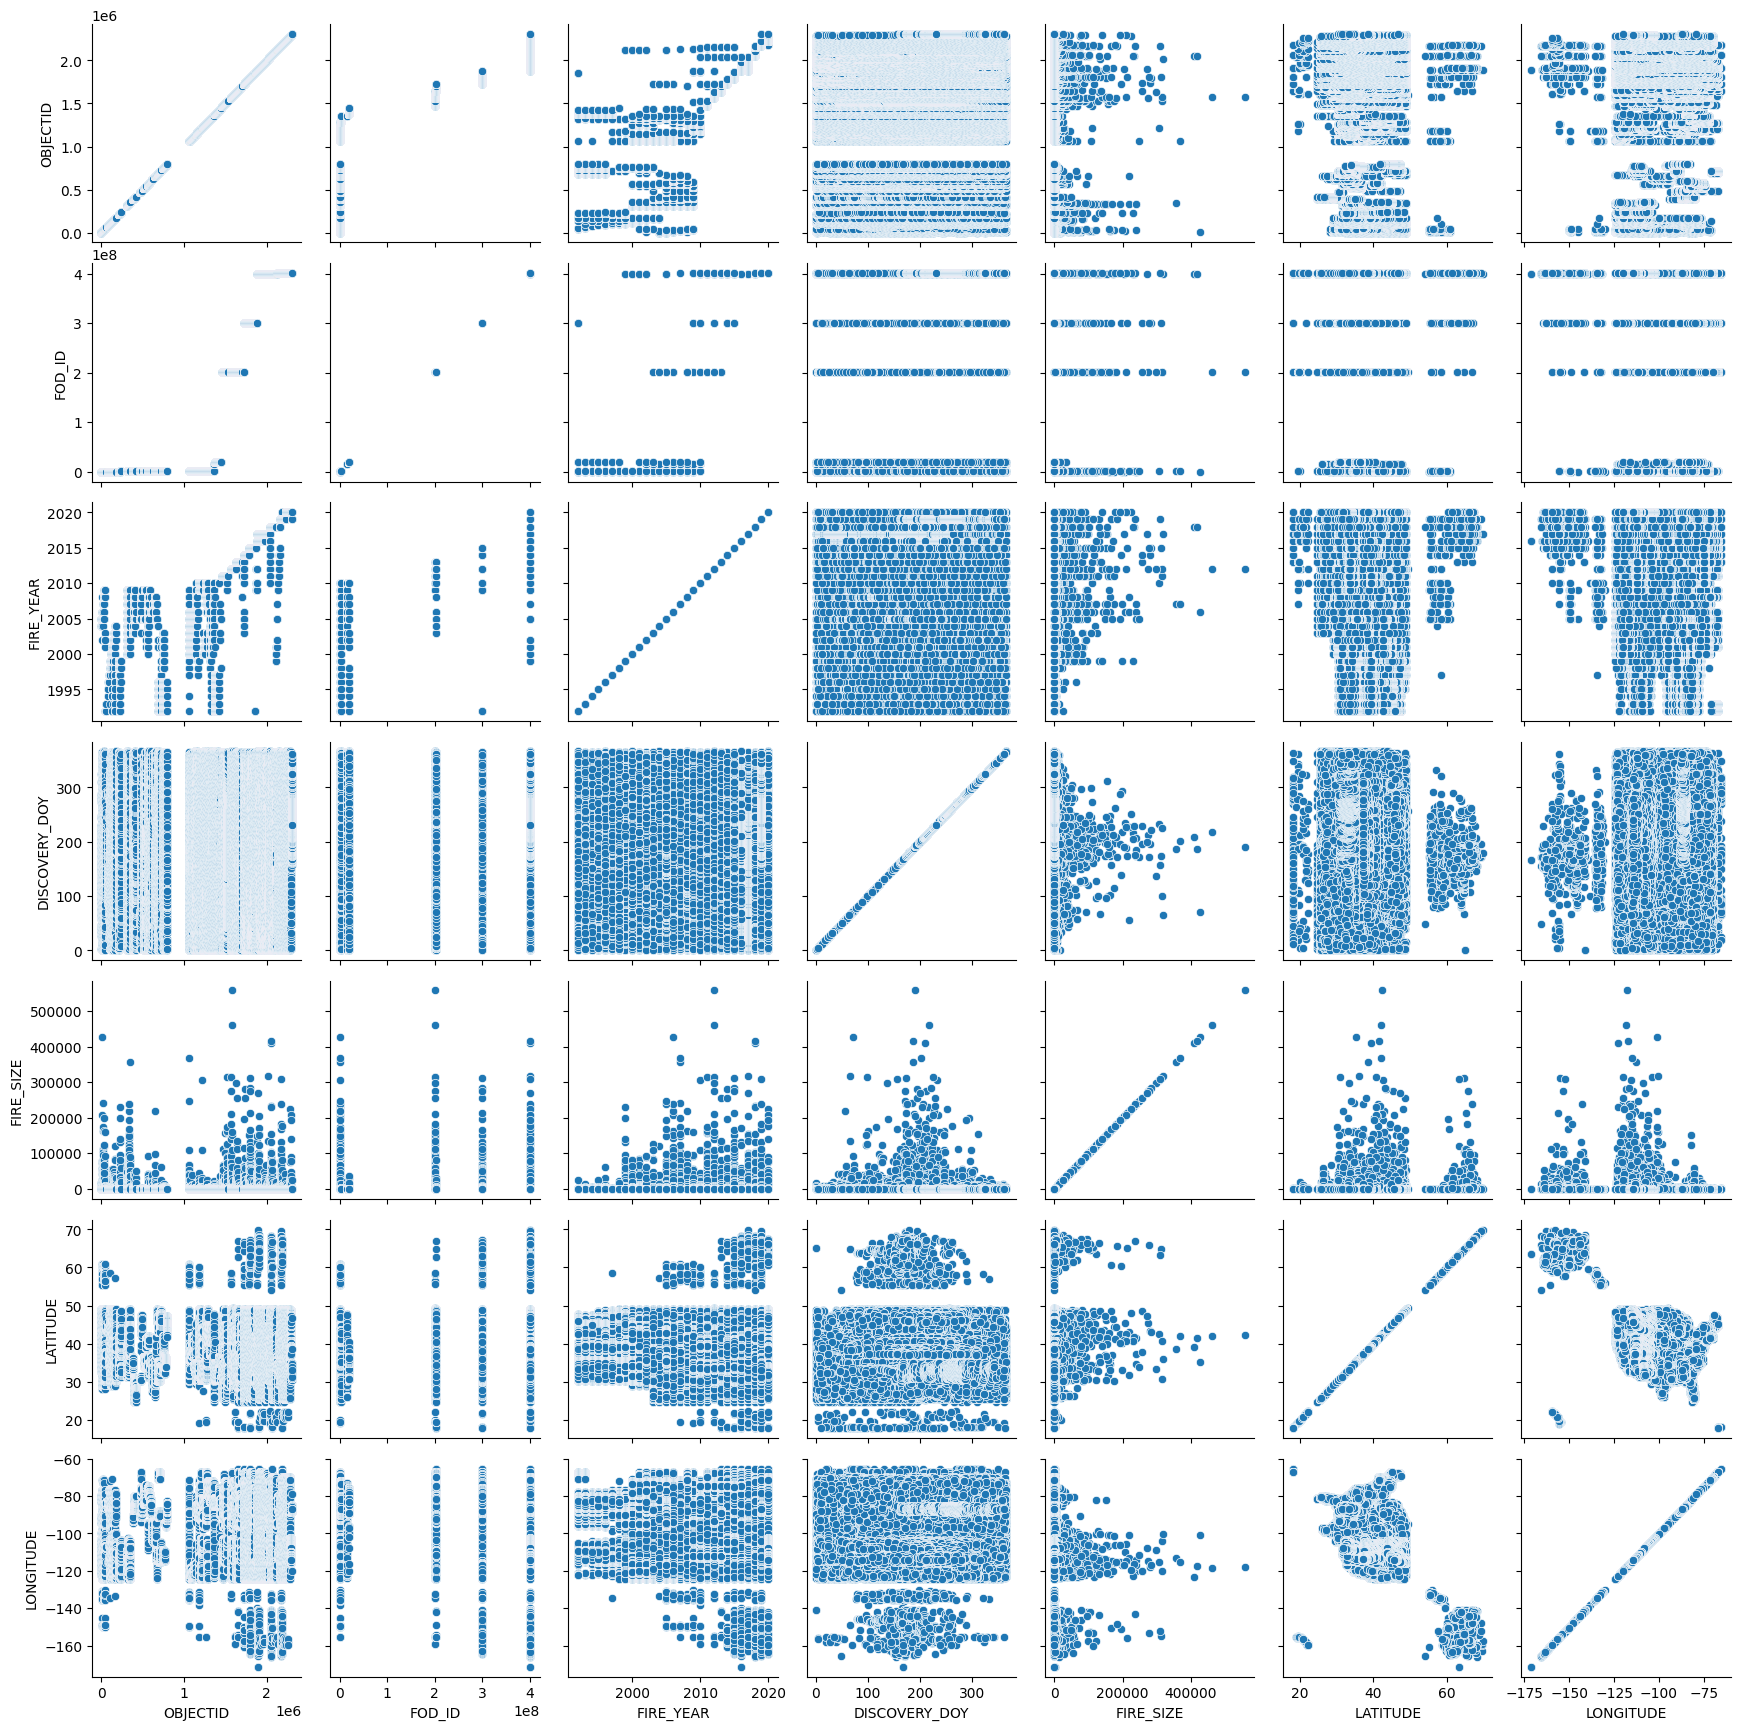

In [14]:
# Visualizing the correlation between the variables/features using seaborn
g = sns.PairGrid(df)
g.map(sns.scatterplot)

From the plot above we can see that there are no linear relationships between the any features with numerical data.<br>
Our target variable is <code>NWCG_CAUSE_CLASSIFICATION</code>, so we will futher anylize the features to draw some more insights 

In [15]:
df.columns

Index(['OBJECTID', 'Shape', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE',
       'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE',
       'DISCOVERY_DOY', 'DISCOVERY_TIME', 'NWCG_CAUSE_CLASSIFICATION',
       'NWCG_GENERAL_CAUSE', 'CONT_DATE', 'FIRE_SIZE', 'FIRE_SIZE_CLASS',
       'LATITUDE', 'LONGITUDE', 'OWNER_DESCR', 'STATE', 'COUNTY', 'FIPS_CODE',
       'FIPS_NAME'],
      dtype='object')

### Let's visualize at some of the general causes of the fires

In [16]:
df['NWCG_GENERAL_CAUSE'].unique()

array(['Power generation/transmission/distribution', 'Natural',
       'Debris and open burning',
       'Missing data/not specified/undetermined',
       'Recreation and ceremony', 'Equipment and vehicle use',
       'Arson/incendiarism', 'Railroad operations and maintenance',
       'Smoking', 'Other causes', 'Fireworks',
       'Misuse of fire by a minor', 'Firearms and explosives use'],
      dtype=object)

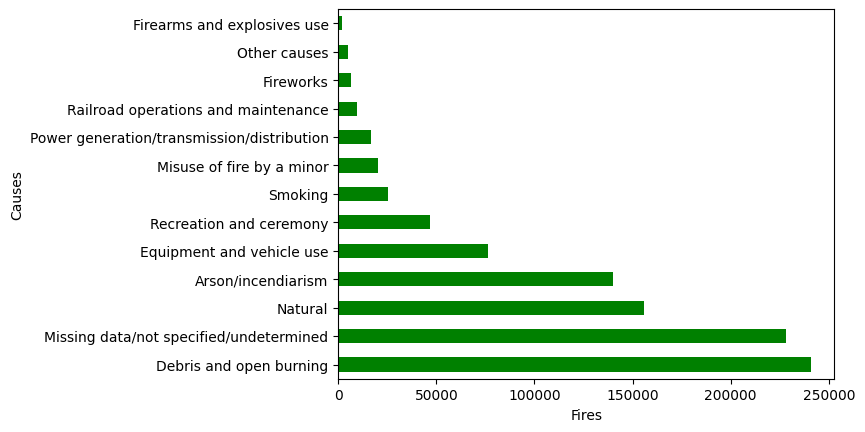

In [17]:
df['NWCG_GENERAL_CAUSE'].value_counts().plot(kind='barh', color='green')
plt.xlabel('Fires')
plt.ylabel('Causes')
plt.show()

<Axes: xlabel='NWCG_CAUSE_CLASSIFICATION', ylabel='count'>

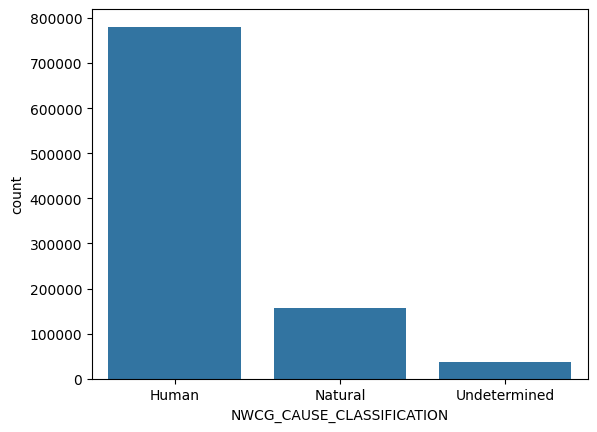

In [18]:
df_new = df.replace('Missing data/not specified/undetermined', 'Undetermined')
sns.countplot(x='NWCG_CAUSE_CLASSIFICATION', data=df_new)

### Now we want to get a visual representation of how the fires occur through the year and also the days of the fire</br>
Let's first get the exact day of the week and month of the year by creating new features in the dataframe</br>
We can do this by using the date time and calendar modules

In [19]:
# importing datetime and calendar 
from datetime import datetime, timedelta
import calendar

# creating to 2 seperate lists to store the days and months the fires happened
Fire_day = []
Fire_month = []

# getting original values for the FIRE_YEAR and DISCOVERY_DOY as lists in order to iterate through 
for year, day in zip(df.FIRE_YEAR.to_list(),df.DISCOVERY_DOY.to_list()):
    first_day = datetime(year, 1, 1)
    target = first_day + timedelta(days = day -1)
    week_day = target.strftime('%A')
    month_name = calendar.month_name[target.month]
    Fire_day.append(week_day)
    Fire_month.append(month_name)

#### Now we can store the values for Fire_day and Fire_month as <code>FIRE_DAY</code> and <code>FIRE_MONTH</code> respectively into the dataframe

In [20]:
df['FIRE_DAY'] = Fire_day
df['FIRE_MONTH'] = Fire_month
df[['FIRE_DAY', 'FIRE_MONTH']]

,FIRE_DAY,FIRE_MONTH
0,Wednesday,February
1,Wednesday,May
2,Monday,May
3,Monday,June
4,Monday,June
...,...,...
2303510,Friday,December
2303511,Wednesday,December
2303512,Friday,December
2303564,Monday,August


<Axes: xlabel='FIRE_MONTH', ylabel='count'>

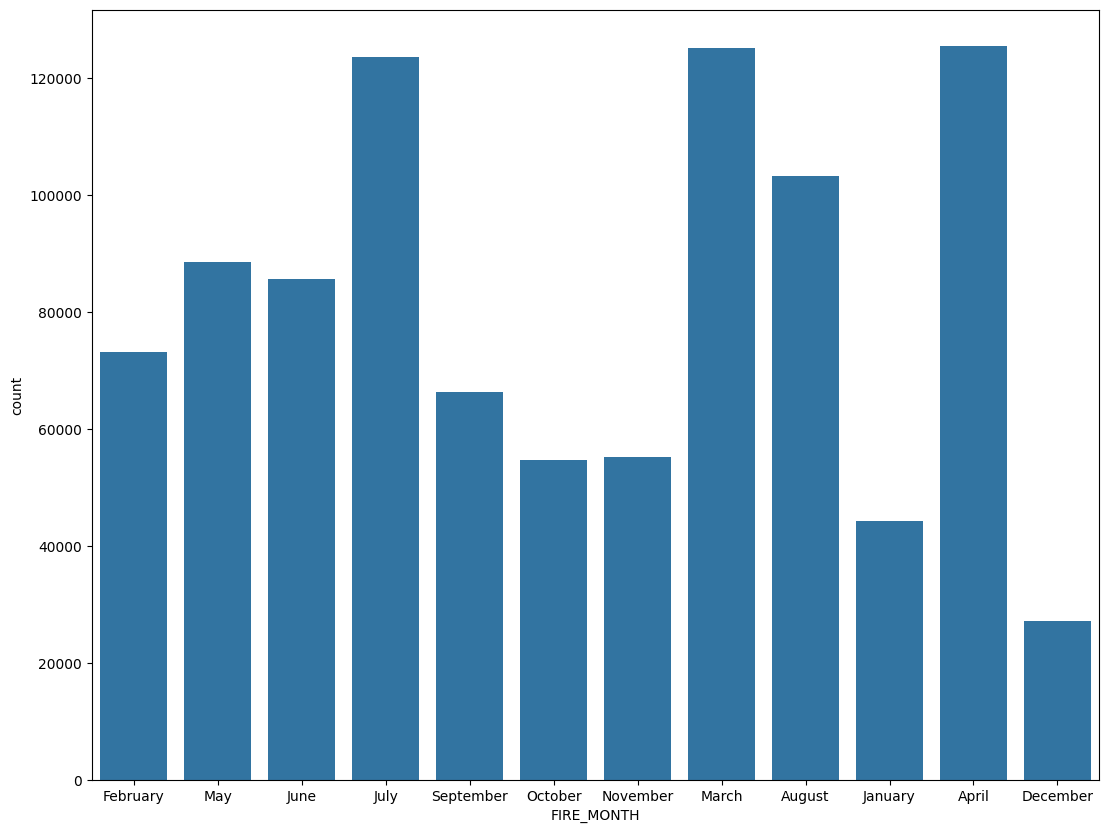

In [21]:
plt.figure(figsize=(13, 10))
sns.countplot(x='FIRE_MONTH', data=df)

#### From the graph above, it is apparent that the most fires occur in March, April and July<br>
we are still not sure what the exact correlation is here

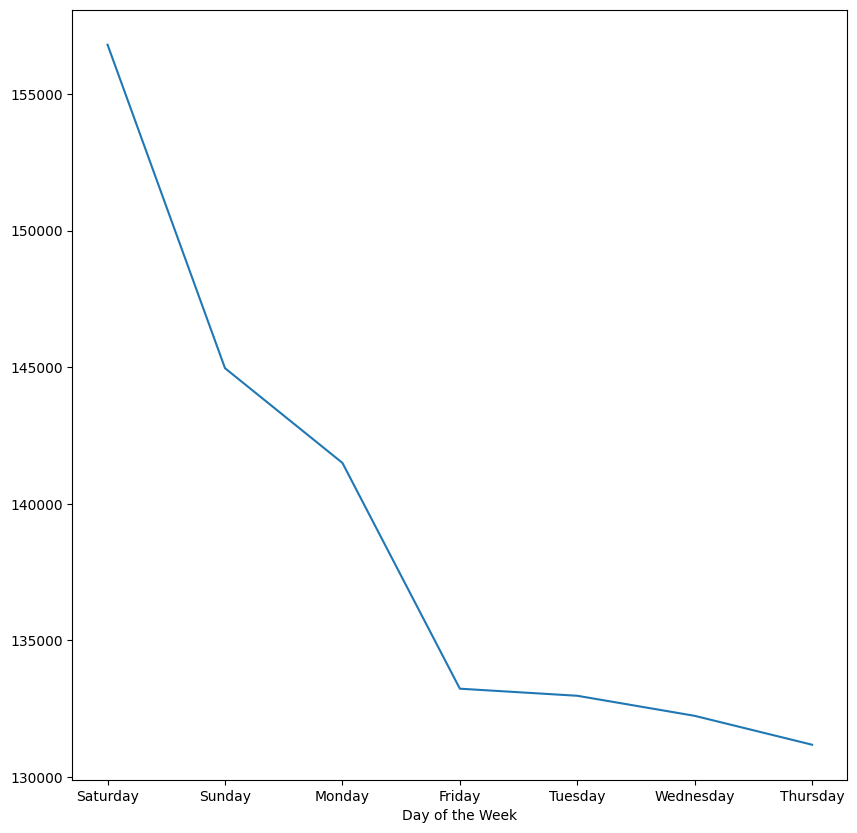

In [22]:
# plotting the week day the fires were discovered
df['FIRE_DAY'].value_counts().plot(kind='line', figsize=(10, 10))
plt.xlabel('Day of the Week')
plt.show()

#### We can see that a lot of fires happen during the weekend which could be an indicator for our model

### Lets also look at the state with the most fires

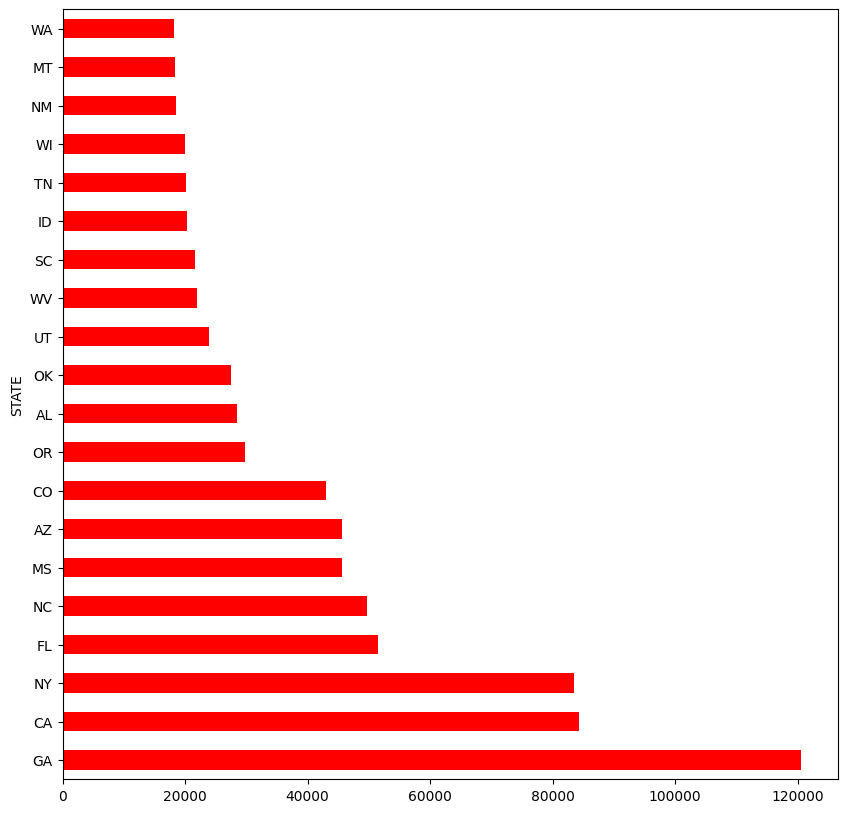

In [23]:
# Limiting it to the top 20 states
df['STATE'].value_counts().head(20).plot(kind='barh',color='red', figsize=(10, 10))
plt.show()

### Interesting to note that Georgia is the state with the most fires<br>
#### We need to take a closer look at the causes of fires

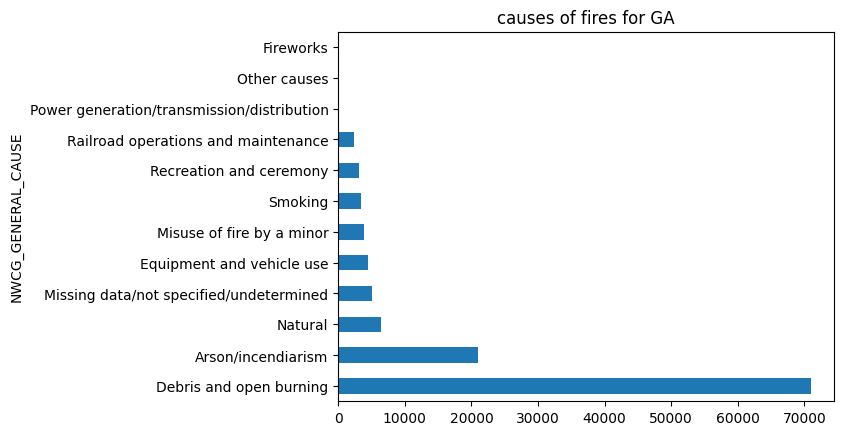

In [24]:
# making a dataframe with fires that have only occured in Georgia and plotting a horizontal bar chart
df_GA = df[df['STATE']=='GA']
df_GA['NWCG_GENERAL_CAUSE'].value_counts().plot(kind='barh',title='causes of fires for GA')
plt.show()

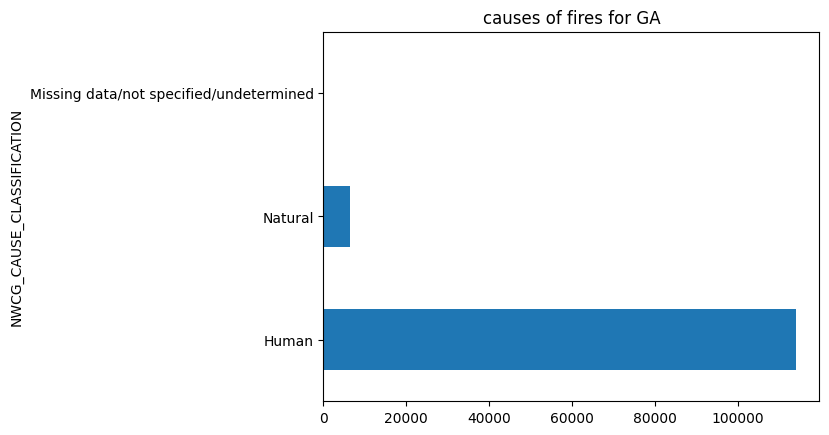

In [25]:
# plotting a horizontal bar chart of the general classification of the fire which is our target varible
df_GA['NWCG_CAUSE_CLASSIFICATION'].value_counts().plot(kind='barh',title='causes of fires for GA')
plt.show()

### There is a high percentage of fires classed as <code>Human</code> causes
and we would also need to drop all the rows with <code>Missing data/not specified/undetermined</code> labels to aid us in further analysis

In [26]:
# drop all rows that contain 'Missing data/not specified/undetermined'
df = df.drop(df[df['NWCG_CAUSE_CLASSIFICATION'] == 'Missing data/not specified/undetermined'].index)

## We also want to find out the duration of these <code>Fires</code> so we need to do some more feature engineering<br> 
- to acheive this we need to get the difference between the day the <code>Fires</code> were discovered and when they were contained
- thus we need the <code>DISCOVERY_DATE</code> and the <code>CONT_DATE</code> data fields

In [27]:
# viewing the data format in both columns
df[['DISCOVERY_DATE', 'CONT_DATE']]

,DISCOVERY_DATE,CONT_DATE
0,2/2/2005,2/2/2005
1,5/12/2004,5/12/2004
2,5/31/2004,5/31/2004
3,6/28/2004,7/3/2004
4,6/28/2004,7/3/2004
...,...,...
2303510,12/20/2019,12/20/2019
2303511,12/25/2019,12/25/2019
2303512,12/27/2019,12/28/2019
2303564,8/17/2020,8/20/2020


#### We'll have to use to the <code>datetime</code> module again to get the difference between both features

In [28]:
from datetime import datetime

fire_duration = []
for start, end in zip(df.DISCOVERY_DATE.to_list(), df.CONT_DATE.to_list()):
    discovery = datetime.strptime(start, "%m/%d/%Y")
    contained = datetime.strptime(end, "%m/%d/%Y") 
    diff = contained - discovery
    fire_duration.append(diff.days)
df['Fire_Duration'] = fire_duration

In [29]:
df['Fire_Duration'].unique()

array([  0,   5,   1,  15,   4,   3,   2,   8,   6,  24,  26,  13,   9,
         7,  11,  20,  12,  19,  17,  92,  16,  10,  28,  14,  23,  31,
        45,  38,  32,  46,  29,  27,  65,  22,  50,  56,  25,  66,  44,
        81,  59,  58,  57,  55,  53,  52,  51,  91,  89, 126,  93,  35,
        30,  34,  70,  47,  21,  95, 124,  76,  36,  60,  48,  73,  18,
        85,  84,  33,  79,  78,  75,  90,  88,  40,  41,  87,  83, 144,
       133,  94,  64, 139,  42,  96,  80,  63,  67, 128, 150, 104,  39,
       109,  43, 102, 105, 103,  82,  99,  97,  62, 112, 111,  86, 123,
        49, 117,  54,  68,  98,  77,  74, 122,  37, 108, 129, 148, 116,
        69,  72, 155, 141, 137, 161,  61, 100, 106, 110, 149, 101,  71,
       136, 118, 125, 114, 113, 177, 162, 115, 132, 184, 140, 107, 151,
       119, 213, 147, 120, 121, 164, 153, 206, 335, 214, 186, 181, 248,
       154, 196, 273, 182, 138, 145, 200, 303, 212, 274, 130, 170, 197,
       192, 194, 193, 178, 166, 172, 146, 135, 329, 346, 219, 34

### Now we would like to see the duration of <code>Fires</code> in correlation to the months they happen and see if we get any inight from that<br>
We will be using a scatter plot for this

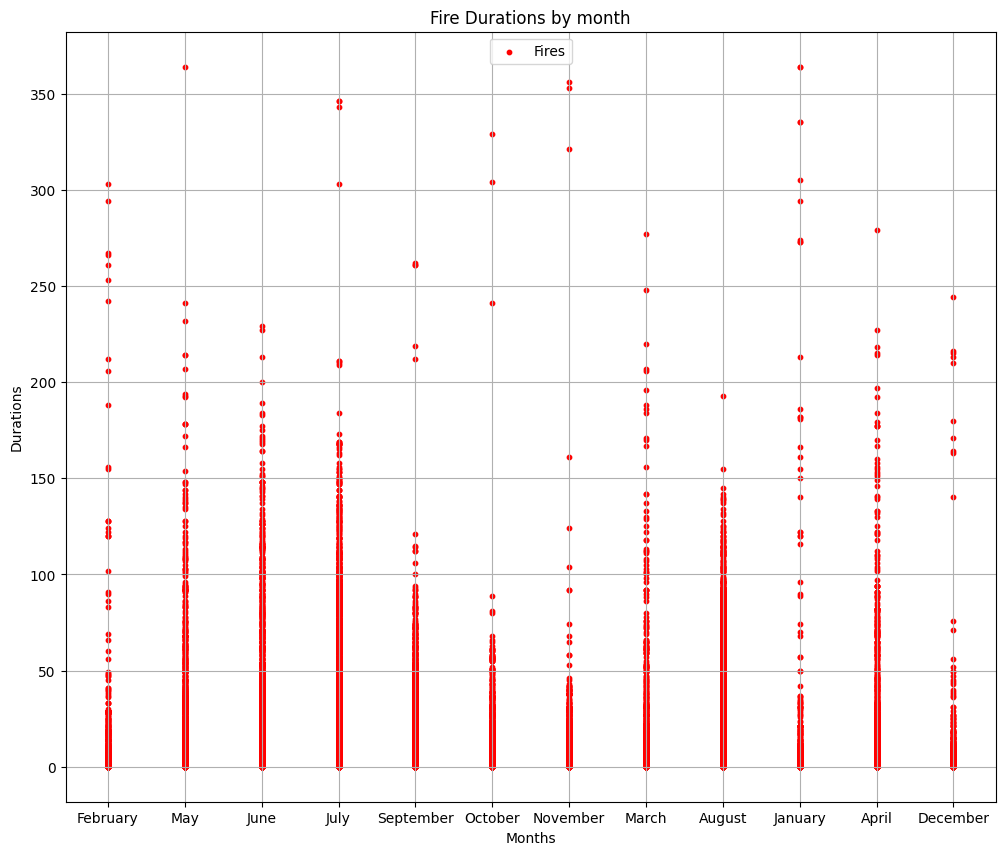

In [30]:
#Create figure and axes
fig, ax = plt.subplots(figsize=(12, 10))

# Customizing Scatter Plot 
ax.scatter(df['FIRE_MONTH'], df['Fire_Duration'], 
           marker='o', #setting up the markers
           s = 10, #setting up the size of the markers
           color='red')#the color for the marker

# the title 
plt.title('Fire Durations by month') 
# labels
plt.xlabel('Months')
plt.ylabel('Durations') 
#including grid
ax.grid()

#Legend at upper center of the figure
ax.legend(["Fires"], loc='upper center')
plt.show()

#### We can presume that a large percentage of the <code>Fires</code> lasting more than 100 days are <code>Natural</code> caueses

#### A key indicator in fire assessment if the <code>FIRE_SIZE</code>, so we should check to see if there is any strong correalation to that feature in our data set

In [31]:
# only get numeric data from the dataframe, then sort by comparing the correlaton values of the features with respect to FIRE_SIZE
df._get_numeric_data().corr()['FIRE_SIZE'].sort_values()

LONGITUDE       -0.040219
OBJECTID        -0.009401
FOD_ID           0.001530
FIRE_YEAR        0.005599
DISCOVERY_DOY    0.008085
LATITUDE         0.024820
Fire_Duration    0.165249
FIRE_SIZE        1.000000
Name: FIRE_SIZE, dtype: float64

<Axes: xlabel='FIRE_SIZE', ylabel='Fire_Duration'>

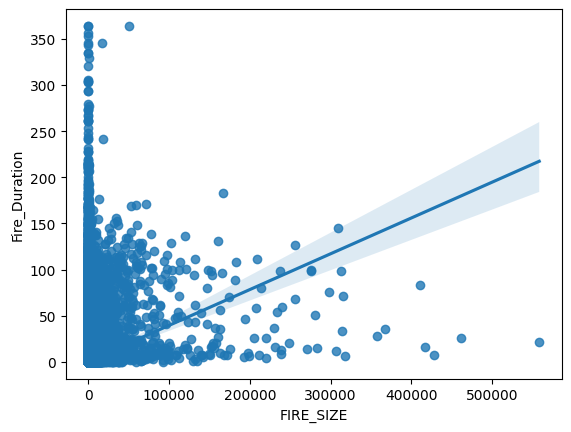

In [32]:
# a regression plot using seaborn
sns.regplot(x = 'FIRE_SIZE', y = 'Fire_Duration', data=df)

#### We observe that there are no strong correlations, but that <code>Fire_Duration</code> has the strongest correlation<br>
#### We should also see if there are any other strong correalations in the data set

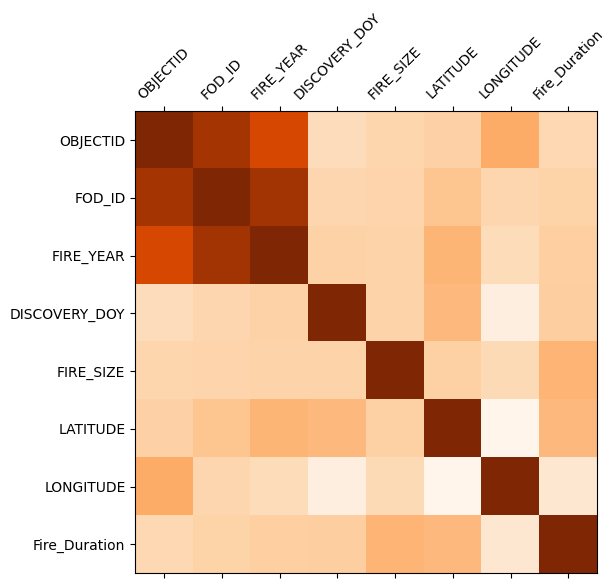

In [33]:
# plotting a matrix to see if there are any strong correlations between the numeric data in the dataset
corr = df._get_numeric_data().corr()
fig, ax = plt.subplots(figsize=(8, 6))
ax.matshow(corr,cmap=plt.cm.Oranges)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
for tick in ax.get_xticklabels():
        tick.set_rotation(45)    
plt.show()

# Fire Duration Analysis and Outlier Detection
First, let's thoroughly analyze fire durations before making decisions about outlier thresholds.

In [34]:
# Analyze Fire Duration distribution
print("Fire Duration Statistics:")
print(df['Fire_Duration'].describe())

# Create detailed percentile breakdown
percentiles = [75, 80, 85, 90, 95, 97, 99]
print("\nDuration Percentiles:")
for p in percentiles:
    value = df['Fire_Duration'].quantile(p/100)
    count = (df['Fire_Duration'] > value).sum()
    percent = (count/len(df))*100
    print(f"{p}th percentile: {value:.1f} days ({count:,} fires, {percent:.1f}% above this)")

Fire Duration Statistics:
count    936720.000000
mean          0.849998
std           6.027920
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         364.000000
Name: Fire_Duration, dtype: float64

Duration Percentiles:
75th percentile: 0.0 days (141,396 fires, 15.1% above this)
80th percentile: 0.0 days (141,396 fires, 15.1% above this)
85th percentile: 1.0 days (67,236 fires, 7.2% above this)
90th percentile: 1.0 days (67,236 fires, 7.2% above this)
95th percentile: 3.0 days (36,488 fires, 3.9% above this)
97th percentile: 5.0 days (25,827 fires, 2.8% above this)
99th percentile: 17.0 days (9,337 fires, 1.0% above this)


- Most fires (75%) are contained same day (0 days)
- Mean duration is 0.83 days
- Maximum duration is 364 days
- High standard deviation (5.94 days) indicates significant variation

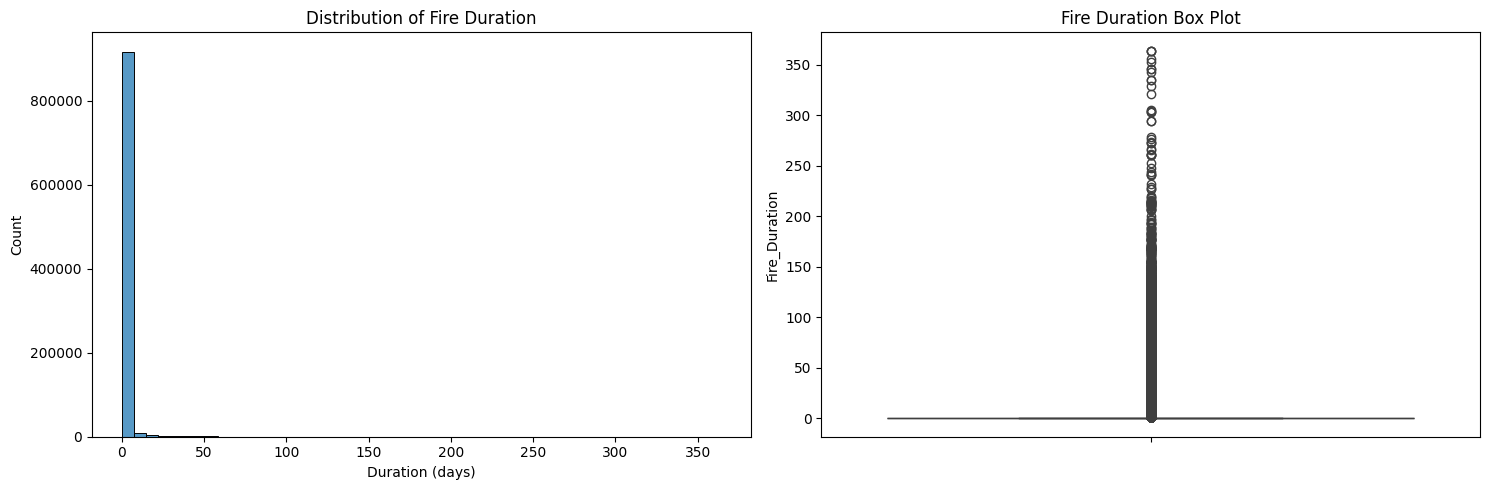

In [35]:
# Visualize duration distribution
plt.figure(figsize=(15, 5))

# Overall distribution
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Fire_Duration', bins=50)
plt.title('Distribution of Fire Duration')
plt.xlabel('Duration (days)')
plt.ylabel('Count')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Fire_Duration'])
plt.title('Fire Duration Box Plot')

plt.tight_layout()
plt.show()

In [36]:
# Analyze long duration fires
print("\nAnalysis of Long Duration Fires:")
long_fires = df[df['Fire_Duration'] > df['Fire_Duration'].quantile(0.95)]
print("\nCause Distribution for Long Duration Fires:")
print(long_fires['NWCG_CAUSE_CLASSIFICATION'].value_counts(normalize=True))

print("\nSize Statistics for Long Duration Fires:")
print(long_fires['FIRE_SIZE'].describe())


Analysis of Long Duration Fires:

Cause Distribution for Long Duration Fires:
NWCG_CAUSE_CLASSIFICATION
Human      0.509126
Natural    0.490874
Name: proportion, dtype: float64

Size Statistics for Long Duration Fires:
count     36488.000000
mean       1622.675456
std       12637.876761
min           0.000100
25%           0.100000
50%           1.000000
75%          38.000000
max      558198.300000
Name: FIRE_SIZE, dtype: float64


Causes:
- Almost evenly split between Human (50.9%) and Natural (49.1%)
- The cause distribution is balanced, suggesting these are valid events

Size characteristics:
- Mean size: 1,340 acres (much larger than overall dataset)
- Median size: 1 acre
- Maximum size: 558,198 acres
- High variation in size (std: 11,273 acres)

## Outlier Detection and Handling
We'll focus on Fire_Duration to detect outliers We exclude LATITUDE and LONGITUDE as these represent valid geographic locations. Large fires are a significant part of the dataset so we will also keep them.

In [37]:
def analyze_fire_durations(df, duration_percentile=97):
    """
    Analyze fires based on duration threshold
    """
    # Calculate duration cutoff
    duration_cutoff = df['Fire_Duration'].quantile(duration_percentile/100)
    
    # Split dataset
    extreme_duration = df[df['Fire_Duration'] > duration_cutoff]
    normal_duration = df[df['Fire_Duration'] <= duration_cutoff]
    
    print(f"Duration Analysis ({duration_percentile}th percentile):")
    print(f"Cutoff: {duration_cutoff:.1f} days")
    print(f"Normal duration fires: {len(normal_duration):,}")
    print(f"Extreme duration fires: {len(extreme_duration):,}")
    
    return normal_duration, extreme_duration

In [38]:
# remove outliers
def clean_fire_durations(df, duration_percentile=97):
    """
    Remove duration outliers based on 97th percentile
    Returns original dataframe with outliers removed
    """
    # Calculate duration cutoff (97th percentile = 5 days)
    duration_cutoff = df['Fire_Duration'].quantile(duration_percentile/100)
    
    # Remove fires with duration > cutoff
    df_cleaned = df[df['Fire_Duration'] <= duration_cutoff].copy()
    
    # Print analysis
    print(f"Duration Analysis ({duration_percentile}th percentile):")
    print(f"Cutoff: {duration_cutoff:.1f} days")
    print(f"Original fires: {len(df):,}")
    print(f"Fires after removing duration outliers: {len(df_cleaned):,}")
    print(f"Fires removed: {len(df) - len(df_cleaned):,}")
    
    return df_cleaned

In [39]:
# Apply the analysis
normal_fires, extreme_fires = analyze_fire_durations(df)

# Analyze characteristics of both groups
print("\nNormal Duration Fires (<= 5 days):")
print("Cause Distribution:")
print(normal_fires['NWCG_CAUSE_CLASSIFICATION'].value_counts(normalize=True))
print("\nSize Statistics:")
print(normal_fires['FIRE_SIZE'].describe())

print("\nExtreme Duration Fires (> 5 days):")
print("Cause Distribution:")
print(extreme_fires['NWCG_CAUSE_CLASSIFICATION'].value_counts(normalize=True))
print("\nSize Statistics:")
print(extreme_fires['FIRE_SIZE'].describe())

Duration Analysis (97th percentile):
Cutoff: 5.0 days
Normal duration fires: 910,893
Extreme duration fires: 25,827

Normal Duration Fires (<= 5 days):
Cause Distribution:
NWCG_CAUSE_CLASSIFICATION
Human      0.842817
Natural    0.157183
Name: proportion, dtype: float64

Size Statistics:
count    910893.000000
mean         29.001374
std         743.494627
min           0.000090
25%           0.100000
50%           0.500000
75%           3.000000
max      220000.000000
Name: FIRE_SIZE, dtype: float64

Extreme Duration Fires (> 5 days):
Cause Distribution:
NWCG_CAUSE_CLASSIFICATION
Human      0.501452
Natural    0.498548
Name: proportion, dtype: float64

Size Statistics:
count     25827.000000
mean       2052.848927
std       14684.731294
min           0.000100
25%           0.100000
50%           1.000000
75%          51.000000
max      558198.300000
Name: FIRE_SIZE, dtype: float64


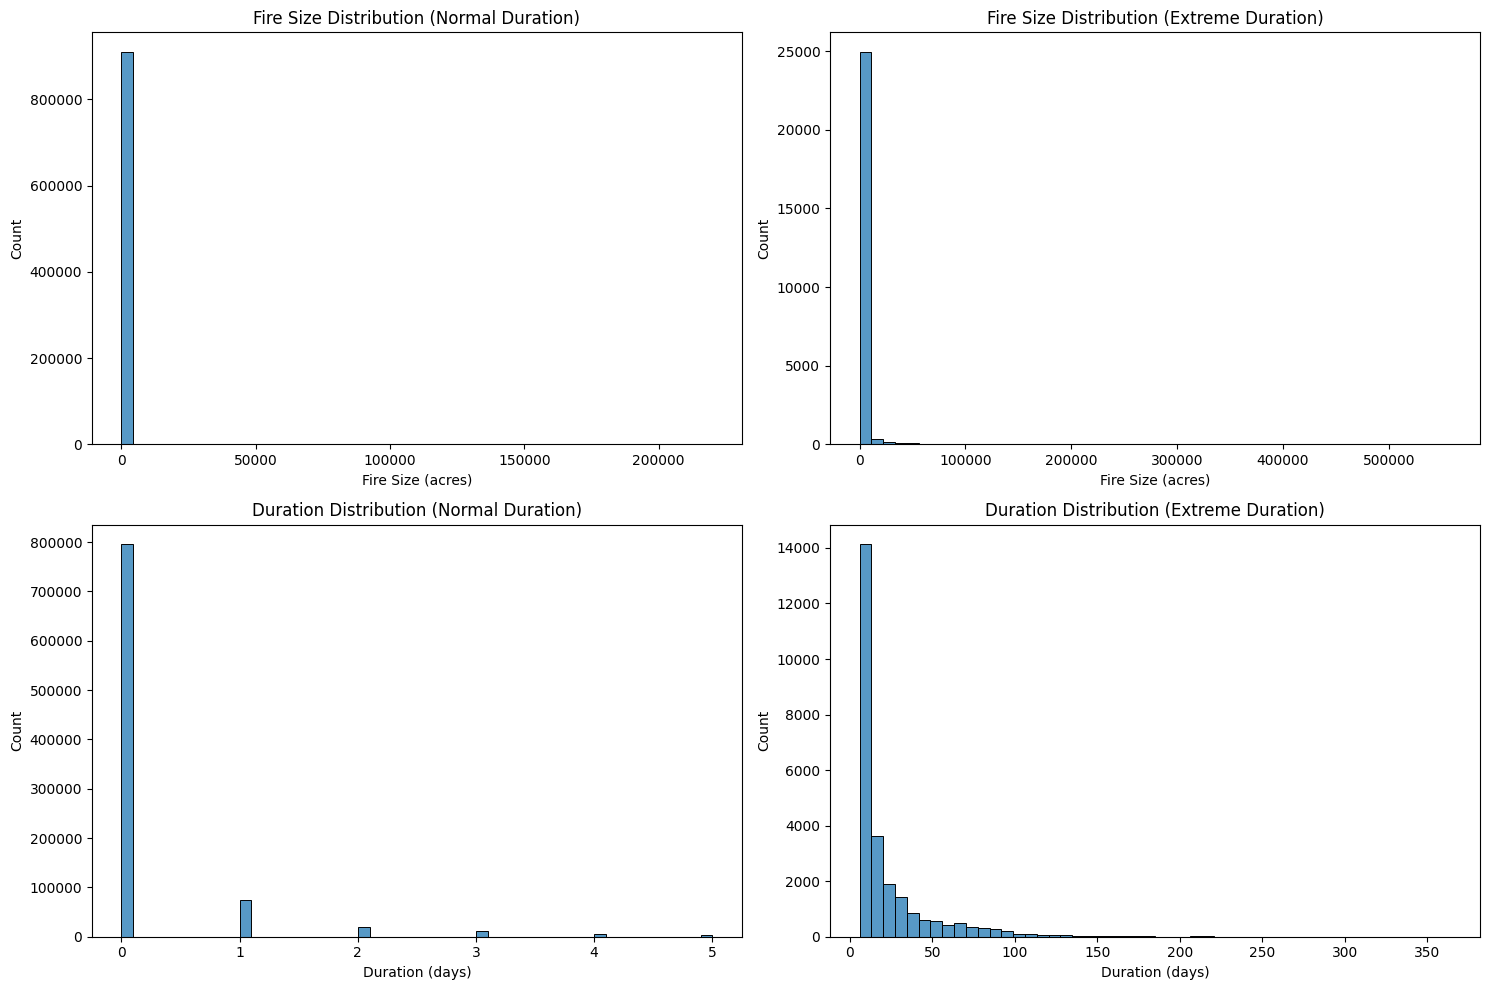

In [40]:
# Visualize the distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Fire Size distributions
sns.histplot(data=normal_fires, x='FIRE_SIZE', bins=50, ax=axes[0,0])
axes[0,0].set_title('Fire Size Distribution (Normal Duration)')
axes[0,0].set_xlabel('Fire Size (acres)')
#axes[0,0].set_xscale('log')  # Use log scale for better visualization
axes[0,0].set_ylabel('Count')

sns.histplot(data=extreme_fires, x='FIRE_SIZE', bins=50, ax=axes[0,1])
axes[0,1].set_title('Fire Size Distribution (Extreme Duration)')
axes[0,1].set_xlabel('Fire Size (acres)')
#axes[0,1].set_xscale('log')  # Use log scale for better visualization
axes[0,1].set_ylabel('Count')

# Duration distributions
sns.histplot(data=normal_fires, x='Fire_Duration', bins=50, ax=axes[1,0])
axes[1,0].set_title('Duration Distribution (Normal Duration)')
axes[1,0].set_xlabel('Duration (days)')

sns.histplot(data=extreme_fires, x='Fire_Duration', bins=50, ax=axes[1,1])
axes[1,1].set_title('Duration Distribution (Extreme Duration)')
axes[1,1].set_xlabel('Duration (days)')

plt.tight_layout()
plt.show()

Duration Analysis (97th percentile):
Cutoff: 5.0 days
Original fires: 936,720
Fires after removing duration outliers: 910,893
Fires removed: 25,827

Duration Statistics After Cleaning:
count    910893.000000
mean          0.212501
std           0.679587
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: Fire_Duration, dtype: float64


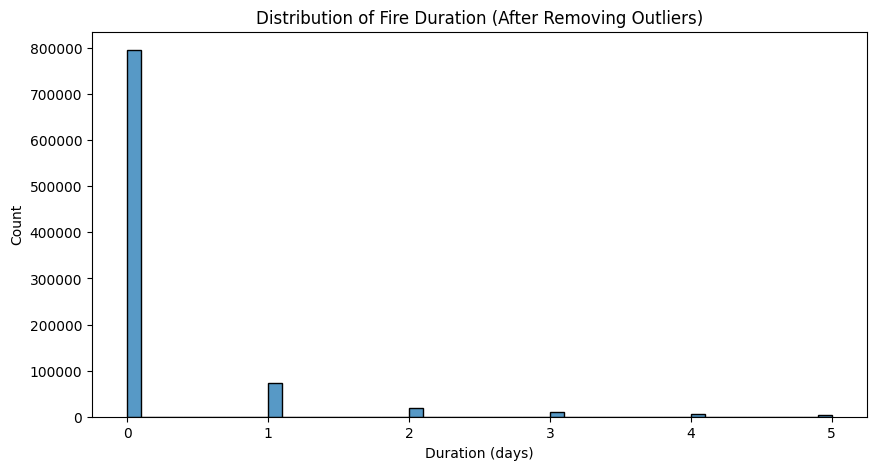


Cause Distribution in Cleaned Dataset:
NWCG_CAUSE_CLASSIFICATION
Human      0.842817
Natural    0.157183
Name: proportion, dtype: float64


In [41]:
# Apply duration cleaning
df_cleaned = clean_fire_durations(df)

# Verify the cleaning
print("\nDuration Statistics After Cleaning:")
print(df_cleaned['Fire_Duration'].describe())

# Show distribution of cleaned durations
plt.figure(figsize=(10, 5))
sns.histplot(data=df_cleaned, x='Fire_Duration', bins=50)
plt.title('Distribution of Fire Duration (After Removing Outliers)')
plt.xlabel('Duration (days)')
plt.ylabel('Count')
plt.show()

# Show cause distribution in cleaned data
print("\nCause Distribution in Cleaned Dataset:")
print(df_cleaned['NWCG_CAUSE_CLASSIFICATION'].value_counts(normalize=True))

### We'll observe the distribution of <code>NWCG_CAUSE_CLASSIFICATION</code> data after the outliers have been removed

<Axes: xlabel='NWCG_CAUSE_CLASSIFICATION', ylabel='count'>

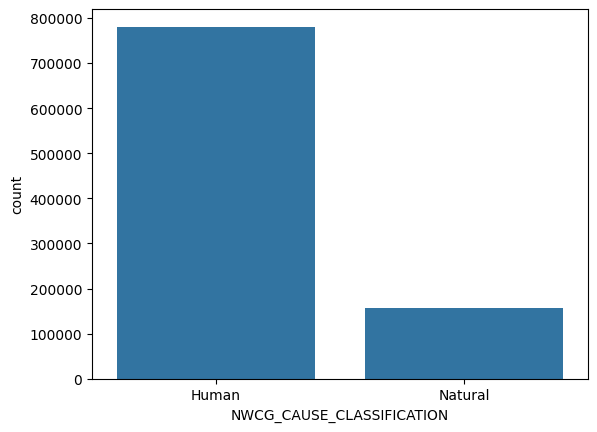

In [42]:
sns.countplot(x='NWCG_CAUSE_CLASSIFICATION', data=df)

## Feature Selectons:
for the next stage in our project we are going to split the data a use features we intend on training our model with

In [43]:
new_df = df[['FIRE_DAY', 'FIRE_MONTH', 'Fire_Duration', 'FIRE_SIZE', 'STATE', 'LATITUDE', 'LONGITUDE', 'NWCG_GENERAL_CAUSE', 'NWCG_CAUSE_CLASSIFICATION']]
new_df.head()

,FIRE_DAY,FIRE_MONTH,Fire_Duration,FIRE_SIZE,STATE,LATITUDE,LONGITUDE,NWCG_GENERAL_CAUSE,NWCG_CAUSE_CLASSIFICATION
0,Wednesday,February,0,0.10,CA,40.036944,-121.005833,Power generation/transmission/distribution,Human
1,Wednesday,May,0,0.25,CA,38.933056,-120.404444,Natural,Natural
2,Monday,May,0,0.10,CA,38.984167,-120.735556,Debris and open burning,Human
3,Monday,June,5,0.10,CA,38.559167,-119.913333,Natural,Natural
4,Monday,June,5,0.10,CA,38.559167,-119.933056,Natural,Natural


### Now we can save this new dataframe to a csv for our next stages in the project

In [44]:
# new_df.to_csv('/Users/kelvinagara/Desktop/Data_Science MSc/Data Minig and Machine Learning/Course Work/GroupProj/group-coursework-bots-ahead/data/wildifire2.csv')